# **Predicting Bitcoin Prices Using Global M2 Money Supply**

Extract, Transform, Load (ETL) for data analysis

1. Data collection - extracting M2 money supply data from multiple sources (TradingView, FRED)
2. Data cleaning - making sure the datasets have a common format, fixing missing values, and converting currencies
3. Data merging - combining multiple datasets into a single structured CSV (merging on the date column)
4. Data transformation - converting foreign M2 values to USD and normalizing for data analysus
5. Data exporting - daving the final dataset into a CSV file for further analysis

**Problem Statement**: Can we use changes in the US and Global M2 money supply and other features such as inflation rates, interest rates, stock market indices, and bitcoin trading volume to predict Bitcoin price movements?

**Data Sources**:

1. Bitcoin Price Data:

   * [Yahoo Finance → BTC historical price data](https://finance.yahoo.com/quote/BTC-USD/history/)

2. M2 Money Supply Data:

   * [Federal Reserve (FRED) → U.S. M2 money supply](https://https://fred.stlouisfed.org/series/M2SL)

   * [World - Major Central Bank M2 Money Supply](https://en.macromicro.me/series/4675/global-money-supply-m2) - The "World - Major Central Bank M2 Money Supply" data presents the M2 money supply figures of the four major central bank: the Federal Reserve System (Fed) of the United States, the European Central Bank (ECB), the Bank of Japan (BOJ), and the People's Bank of China (PBOC).

   * Need to add M2 money supply figures for US, Europe, Japan, & China individually


**Key Features & Variables**:

1. U.S. M2 Money Supply

2. Global M2 Money Supply (monthly)

3. Inflation rate - [Consumer Price Index](https://fred.stlouisfed.org/series/CPIAUCSL) (CPI) and [Producer Price Index](https://fred.stlouisfed.org/series/PPIACO) (PPI)

4. [Interest rates](https://fred.stlouisfed.org/series/DFF) (Federal Funds Rate)

5. Stock market indices ([S&P 500](https://fred.stlouisfed.org/series/SP500), Nasdaq)

6. [Bitcoin trading volume](https://finance.yahoo.com/quote/BTC-USD/)

**Target Variable**: Bitcoin price (daily, weekly, or monthly)



**Business & Practical Impact**:
If a strong correlation exists, investors could use M2 trends to anticipate BTC price movements. This project could serve as an early warning system for crypto traders and institutions. Useful for hedge funds, financial analysts, and crypto enthusiasts.

**Imports**:

In [1]:
import yfinance as yf
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Download bitcoin price data using Yahoo Finance API:**

In [2]:
# Download BTC-USD daily price data
btc_data = yf.download("BTC-USD", start="2015-01-01", end="2025-03-30", interval="1d")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
# Reset index to remove MultiIndex structure
btc_data = btc_data[['Close']].reset_index()

In [4]:
# Rename columns
btc_data.rename(columns={'Date': 'date', 'Close': 'btc_price'}, inplace=True)

In [5]:
# Ensure 'date' is in datetime format
btc_data['date'] = pd.to_datetime(btc_data['date'])

In [ ]:
# Confirm the dataframe structure
print(btc_data.info())
print(btc_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3741 entries, 0 to 3740
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   (date, )              3741 non-null   datetime64[ns]
 1   (btc_price, BTC-USD)  3741 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 58.6 KB
None
Price        date   btc_price
Ticker                BTC-USD
0      2015-01-01  314.248993
1      2015-01-02  315.032013
2      2015-01-03  281.082001
3      2015-01-04  264.195007
4      2015-01-05  274.473999


In [6]:
# see bitcoin price on a monthly output over last 10 years
btc_data_monthly = btc_data.resample('M', on='date').last()

<ipython-input-6-71c863112bf6>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  btc_data_monthly = btc_data.resample('M', on='date').last()
<ipython-input-6-71c863112bf6>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  btc_data_monthly = btc_data.resample('M', on='date').last()


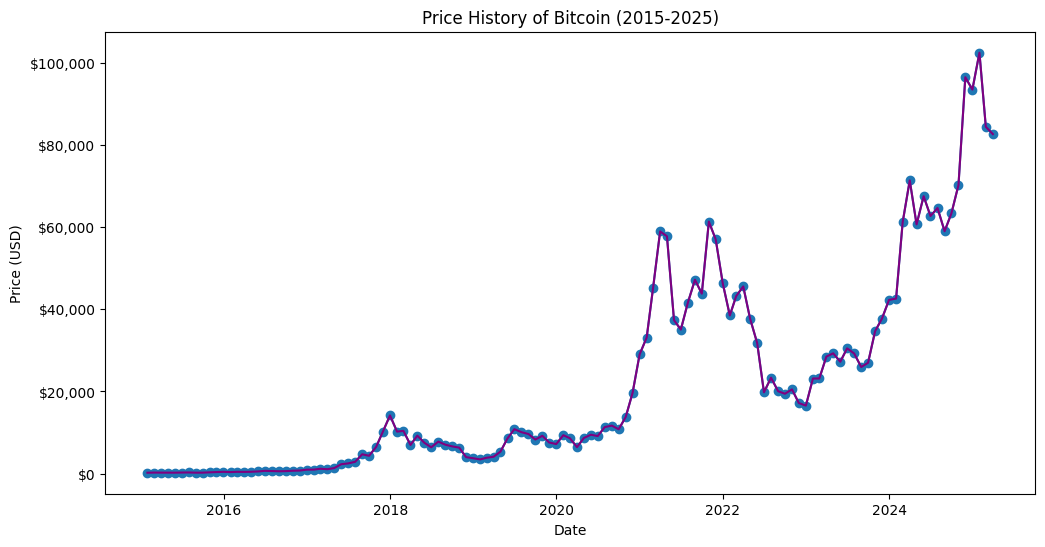

In [16]:
# create a graph that shows the price of bitcoin from 2015 to 2025 using yearly averages
plt.figure(figsize=(12, 6))
plt.plot(btc_data_monthly.index, btc_data_monthly['btc_price'], marker='o', linestyle='-')
# add labels to graph to show the price in usd with a comma
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.title('Price History of Bitcoin (2015-2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
# add dollar sign to y axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.0f}".format(x)))
# change color of line to be dark purple
plt.plot(btc_data_monthly.index, btc_data_monthly['btc_price'], color='purple')
plt.grid(False)
plt.show()

In [18]:
# create a table of yearly averages
btc_data_yearly = btc_data.resample('Y', on='date').last()
btc_data_yearly.head(10)


<ipython-input-18-0c668596d99d>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  btc_data_yearly = btc_data.resample('Y', on='date').last()
<ipython-input-18-0c668596d99d>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  btc_data_yearly = btc_data.resample('Y', on='date').last()


Price,btc_price
Ticker,BTC-USD
date,
2015-12-31,430.566986
2016-12-31,963.742981
2017-12-31,14156.400391
2018-12-31,3742.700439
2019-12-31,7193.599121
2020-12-31,29001.720703
2021-12-31,46306.445312
2022-12-31,16547.496094


**Download U.S. M2 Money Supply Data:**



In [ ]:
# Download M2 money supply data (monthly from FRED)
m2_data = pdr.get_data_fred('M2SL', start="2015-01-01", end="2025-03-30")

In [ ]:
# Reset index to remove MultiIndex issues
m2_data = m2_data.reset_index()

In [ ]:
# Rename columns
m2_data.rename(columns={'DATE': 'date', 'M2SL': 'm2_supply'}, inplace=True)

In [ ]:
# Convert 'date' to datetime format
m2_data['date'] = pd.to_datetime(m2_data['date'])

In [ ]:
# Resample to daily frequency and forward-fill missing values
m2_data = m2_data.set_index('date').resample('D').ffill().reset_index()

In [ ]:
# Confirm the dataframe structure
print(m2_data.info())
print(m2_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3685 entries, 0 to 3684
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       3685 non-null   datetime64[ns]
 1   m2_supply  3685 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.7 KB
None
        date  m2_supply
0 2015-01-01    11788.8
1 2015-01-02    11788.8
2 2015-01-03    11788.8
3 2015-01-04    11788.8
4 2015-01-05    11788.8


**Merge data:**

In [ ]:
# Convert both 'date' columns to datetime format
btc_data['date'] = pd.to_datetime(btc_data['date'])
m2_data['date'] = pd.to_datetime(m2_data['date'])

In [ ]:
print(btc_data['date'].min(), btc_data['date'].max())
print(m2_data['date'].min(), m2_data['date'].max())

2015-01-01 00:00:00 2025-03-29 00:00:00
2015-01-01 00:00:00 2025-02-01 00:00:00


In [ ]:
# Forward-fill missing M2 values to ensure full coverage
m2_data = m2_data.set_index('date').reindex(pd.date_range(start=btc_data['date'].min(),
                                                           end=btc_data['date'].max(),
                                                           freq='D')).ffill().reset_index()

# Rename back to 'date' column
m2_data.rename(columns={'index': 'date'}, inplace=True)

In [ ]:
btc_data['date'] = btc_data['date'].dt.normalize()
m2_data['date'] = m2_data['date'].dt.normalize()

In [ ]:
# Fix MultiIndex issue
btc_data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in btc_data.columns]

# Rename columns again
btc_data.rename(columns={'Date': 'date', 'Close': 'btc_price'}, inplace=True)

Index(['date_', 'btc_price_BTC-USD'], dtype='object')


In [ ]:
print("BTC Data Columns:", btc_data.columns)
print("M2 Data Columns:", m2_data.columns)

BTC Data Columns: Index(['date_', 'btc_price_BTC-USD'], dtype='object')
M2 Data Columns: Index(['date', 'm2_supply'], dtype='object')


In [ ]:
btc_data.rename(columns={'date_': 'date', 'btc_price_BTC-USD': 'btc_price'}, inplace=True)

# Print again to verify
print("Fixed BTC Data Columns:", btc_data.columns)
print("M2 Data Columns:", m2_data.columns)

Fixed BTC Data Columns: Index(['date', 'btc_price'], dtype='object')
M2 Data Columns: Index(['date', 'm2_supply'], dtype='object')


In [ ]:
merged_data = pd.merge(btc_data, m2_data, on='date', how='inner', validate="one_to_one")
print(merged_data.head())

        date   btc_price  m2_supply
0 2015-01-01  314.248993    11788.8
1 2015-01-02  315.032013    11788.8
2 2015-01-03  281.082001    11788.8
3 2015-01-04  264.195007    11788.8
4 2015-01-05  274.473999    11788.8


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3741 entries, 0 to 3740
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       3741 non-null   datetime64[ns]
 1   btc_price  3741 non-null   float64       
 2   m2_supply  3741 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 87.8 KB




---


**Download inflation rates:**

CPI (Consumer Price Index) & PPI (Producer Price Index) track inflation

U.S. CPI & PPI from FRED API

In [ ]:
# Get CPI and PPI from FRED
cpi_data = pdr.get_data_fred('CPIAUCSL', start="2015-01-01", end="2025-03-30")
ppi_data = pdr.get_data_fred('PPIACO', start="2015-01-01", end="2025-03-30")

In [ ]:
# Reset index to make "date" a column
cpi_data.reset_index(inplace=True)
ppi_data.reset_index(inplace=True)

In [ ]:
# Rename columns for clarity
cpi_data.rename(columns={"CPIAUCSL": "cpi"}, inplace=True)
ppi_data.rename(columns={"PPIACO": "ppi"}, inplace=True)

In [ ]:
print(merged_data.columns)
print(cpi_data.columns)
print(ppi_data.columns)

Index(['date', 'btc_price', 'm2_supply'], dtype='object')
Index(['DATE', 'cpi'], dtype='object')
Index(['DATE', 'ppi'], dtype='object')


In [ ]:
# Rename 'DATE' to 'date' in CPI and PPI datasets
cpi_data.rename(columns={'DATE': 'date'}, inplace=True)
ppi_data.rename(columns={'DATE': 'date'}, inplace=True)

In [ ]:
# Convert 'date' column to datetime format for consistency
merged_data['date'] = pd.to_datetime(merged_data['date'])
cpi_data['date'] = pd.to_datetime(cpi_data['date'])
ppi_data['date'] = pd.to_datetime(ppi_data['date'])

In [ ]:
# Merge CPI and PPI into merged_data
merged_data = pd.merge(merged_data, cpi_data, on="date", how="left")
merged_data = pd.merge(merged_data, ppi_data, on="date", how="left")

In [ ]:
print(merged_data.info())  # Ensure CPI and PPI columns exist
print(merged_data.head())  # Check first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3741 entries, 0 to 3740
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       3741 non-null   datetime64[ns]
 1   btc_price  3741 non-null   float64       
 2   m2_supply  3741 non-null   float64       
 3   cpi        122 non-null    float64       
 4   ppi        122 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 146.3 KB
None
        date   btc_price  m2_supply      cpi    ppi
0 2015-01-01  314.248993    11788.8  234.747  192.0
1 2015-01-02  315.032013    11788.8      NaN    NaN
2 2015-01-03  281.082001    11788.8      NaN    NaN
3 2015-01-04  264.195007    11788.8      NaN    NaN
4 2015-01-05  274.473999    11788.8      NaN    NaN


In [ ]:
# interpolate missing values
merged_data['cpi'] = merged_data['cpi'].interpolate(method='linear')
merged_data['ppi'] = merged_data['ppi'].interpolate(method='linear')

In [ ]:
merged_data.head()

,date,btc_price,m2_supply,cpi,ppi
0,2015-01-01,314.248993,11788.8,234.747000,192.000000
1,2015-01-02,315.032013,11788.8,234.766194,191.970968
2,2015-01-03,281.082001,11788.8,234.785387,191.941935
3,2015-01-04,264.195007,11788.8,234.804581,191.912903
4,2015-01-05,274.473999,11788.8,234.823774,191.883871




---


**Download Interest Rates:**

Federal Funds Rate from the FRED API

In [ ]:
# Get Fed Funds Rate data from FRED
fed_funds_data = pdr.get_data_fred('FEDFUNDS', start="2015-01-01", end="2025-03-30")

In [ ]:
# Reset index and rename columns
fed_funds_data.reset_index(inplace=True)
fed_funds_data.rename(columns={"DATE": "date", "FEDFUNDS": "fed_funds_rate"}, inplace=True)

In [ ]:
# Convert date to datetime format for consistency
fed_funds_data['date'] = pd.to_datetime(fed_funds_data['date'])

In [ ]:
# Ensure date is in datetime format in merged_data
merged_data['date'] = pd.to_datetime(merged_data['date'])

In [ ]:
# Merge the datasets on "date"
merged_data = pd.merge(merged_data, fed_funds_data, on="date", how="left")

In [ ]:
merged_data['fed_funds_rate'].fillna(method='ffill', inplace=True)

<ipython-input-33-b432ffecd9ba>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['fed_funds_rate'].fillna(method='ffill', inplace=True)
<ipython-input-33-b432ffecd9ba>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['fed_funds_rate'].fillna(method='ffill', inplace=True)




---


**Stock Market Indices Data:**

Daily S&P 500 (^GSPC) and Nasdaq (^IXIC) prices from Yahoo Finance

In [ ]:
# Download stock index data from Yahoo Finance
sp500_data = yf.download('^GSPC', start="2015-01-01", end="2025-03-30")[['Close']]
nasdaq_data = yf.download('^IXIC', start="2015-01-01", end="2025-03-30")[['Close']]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Rename columns
sp500_data.rename(columns={'Close': 'sp500'}, inplace=True)
nasdaq_data.rename(columns={'Close': 'nasdaq'}, inplace=True)

In [ ]:
# Reset index to get 'date' as a column
sp500_data.reset_index(inplace=True)
nasdaq_data.reset_index(inplace=True)

In [ ]:
# Convert date to datetime format for consistency
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])
nasdaq_data['Date'] = pd.to_datetime(nasdaq_data['Date'])

In [ ]:
# Ensure 'date' column is in datetime format
merged_data['date'] = pd.to_datetime(merged_data['date'])

In [ ]:
# Reset index to ensure 'date' is a column and not an index
sp500_data = sp500_data.reset_index()
nasdaq_data = nasdaq_data.reset_index()

In [ ]:
# Ensure 'Date' is in datetime format and rename to match merged_data
sp500_data.rename(columns={'Date': 'date'}, inplace=True)
nasdaq_data.rename(columns={'Date': 'date'}, inplace=True)
sp500_data['date'] = pd.to_datetime(sp500_data['date'])
nasdaq_data['date'] = pd.to_datetime(nasdaq_data['date'])

In [ ]:
# Reset index
merged_data = merged_data.reset_index(drop=True)

In [ ]:
# Ensure 'date' column is in datetime format
merged_data['date'] = pd.to_datetime(merged_data['date'])

In [ ]:
sp500_data.columns = sp500_data.columns.droplevel(1)  # Drop the second index level
nasdaq_data.columns = nasdaq_data.columns.droplevel(1)

In [ ]:
sp500_data.rename(columns={'Price': 'date', 'sp500': 'sp500'}, inplace=True)
nasdaq_data.rename(columns={'Price': 'date', 'nasdaq': 'nasdaq'}, inplace=True)

In [ ]:
sp500_data['date'] = pd.to_datetime(sp500_data['date']).dt.normalize()
nasdaq_data['date'] = pd.to_datetime(nasdaq_data['date']).dt.normalize()
merged_data['date'] = pd.to_datetime(merged_data['date']).dt.normalize()

In [ ]:
merged_data = merged_data.merge(sp500_data[['date', 'sp500']], on='date', how='left')
merged_data = merged_data.merge(nasdaq_data[['date', 'nasdaq']], on='date', how='left')

In [ ]:
merged_data[['sp500', 'nasdaq']] = merged_data[['sp500', 'nasdaq']].fillna(method='ffill')

<ipython-input-60-e4f755ce1828>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data[['sp500', 'nasdaq']] = merged_data[['sp500', 'nasdaq']].fillna(method='ffill')


In [ ]:
merged_data.head()

,date,btc_price,m2_supply,cpi,ppi,fed_funds_rate,sp500,nasdaq
0,2015-01-01,314.248993,11788.8,234.747000,192.000000,0.11,NaN,NaN
1,2015-01-02,315.032013,11788.8,234.766194,191.970968,0.11,2058.199951,4726.810059
2,2015-01-03,281.082001,11788.8,234.785387,191.941935,0.11,2058.199951,4726.810059
3,2015-01-04,264.195007,11788.8,234.804581,191.912903,0.11,2058.199951,4726.810059
4,2015-01-05,274.473999,11788.8,234.823774,191.883871,0.11,2020.579956,4652.569824


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3741 entries, 0 to 3740
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            3741 non-null   datetime64[ns]
 1   btc_price       3741 non-null   float64       
 2   m2_supply       3741 non-null   float64       
 3   cpi             3741 non-null   float64       
 4   ppi             3741 non-null   float64       
 5   fed_funds_rate  3741 non-null   float64       
 6   sp500           3740 non-null   float64       
 7   nasdaq          3740 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 233.9 KB




---


**Bitcoin Trading Volume:**

Bitcoin Trading Volume from Yahoo Finance

In [ ]:
btc_volume = yf.download("BTC-USD", start="2015-01-01", end="2025-03-30", interval="1d")[['Volume']]
btc_volume.rename(columns={'Volume': 'btc_volume'}, inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
print(btc_volume.columns)
print(merged_data.columns)

MultiIndex([('btc_volume', 'BTC-USD')],
           names=['Price', 'Ticker'])
Index(['date', 'btc_price', 'm2_supply', 'cpi', 'ppi', 'fed_funds_rate',
       'sp500', 'nasdaq'],
      dtype='object')


In [ ]:
# Drop the second index level
btc_volume.columns = btc_volume.columns.droplevel(1)

In [ ]:
# Rename columns
btc_volume.rename(columns={'btc_volume': 'btc_volume'}, inplace=True)

In [ ]:
print(btc_volume.columns)
print(merged_data.columns)

Index(['btc_volume'], dtype='object', name='Price')
Index(['date', 'btc_price', 'm2_supply', 'cpi', 'ppi', 'fed_funds_rate',
       'sp500', 'nasdaq'],
      dtype='object')


In [ ]:
print(btc_volume.index)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2025-03-20', '2025-03-21', '2025-03-22', '2025-03-23',
               '2025-03-24', '2025-03-25', '2025-03-26', '2025-03-27',
               '2025-03-28', '2025-03-29'],
              dtype='datetime64[ns]', name='Date', length=3741, freq=None)


In [ ]:
btc_volume = btc_volume.reset_index()  # Moves 'Date' from index to column
btc_volume.rename(columns={'Date': 'date'}, inplace=True)  # Match 'merged_data'

In [ ]:
btc_volume['date'] = pd.to_datetime(btc_volume['date']).dt.normalize()
merged_data['date'] = pd.to_datetime(merged_data['date']).dt.normalize()

In [ ]:
merged_data = merged_data.merge(btc_volume[['date', 'btc_volume']], on='date', how='left')

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3741 entries, 0 to 3740
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            3741 non-null   datetime64[ns]
 1   btc_price       3741 non-null   float64       
 2   m2_supply       3741 non-null   float64       
 3   cpi             3741 non-null   float64       
 4   ppi             3741 non-null   float64       
 5   fed_funds_rate  3741 non-null   float64       
 6   sp500           3740 non-null   float64       
 7   nasdaq          3740 non-null   float64       
 8   btc_volume      3741 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 263.2 KB


In [ ]:
merged_data.head()

,date,btc_price,m2_supply,cpi,ppi,fed_funds_rate,sp500,nasdaq,btc_volume
0,2015-01-01,314.248993,11788.8,234.747000,192.000000,0.11,NaN,NaN,8036550
1,2015-01-02,315.032013,11788.8,234.766194,191.970968,0.11,2058.199951,4726.810059,7860650
2,2015-01-03,281.082001,11788.8,234.785387,191.941935,0.11,2058.199951,4726.810059,33054400
3,2015-01-04,264.195007,11788.8,234.804581,191.912903,0.11,2058.199951,4726.810059,55629100
4,2015-01-05,274.473999,11788.8,234.823774,191.883871,0.11,2020.579956,4652.569824,43962800


Save data:

In [ ]:
merged_data.to_csv('merged_data.csv', index=False)

In [ ]:
from google.colab import files
files.download('merged_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>